In [2]:
from os import listdir
from os.path import isfile, join
import dateutil
import math
import matplotlib.pyplot as plt

# import data

In [4]:
dataDir = "data"
files = [f for f in listdir(dataDir) if isfile(join(dataDir ,f))]

def readFile(str, parseY):
    with open(str) as f:
        lines = f.readlines()
        dates = []
        ys = []

        for line in lines:
            tokens = line.split('\t')
            date = dateutil.parser.isoparse(tokens[0])
            y = parseY(tokens[1])
            dates.append(date)
            ys.append(y)

    return dates, ys

data = {}

for file in files:
    cospar = file[:file.index('_')]
    type = file[file.index('_')+1:file.index('.')]
    dates, ys = readFile(join(dataDir,file), lambda x: math.degrees(float(x)))

    if(not cospar in data):
        data[cospar] = {type:[dates,ys]}
    else:
        data[cospar][type] = [dates, ys]

print("Available cospars: ")
for cospar in data.keys():
    print("\t" + cospar)


Available cospars: 
	2016-011A
	2015-034A
	2018-039A


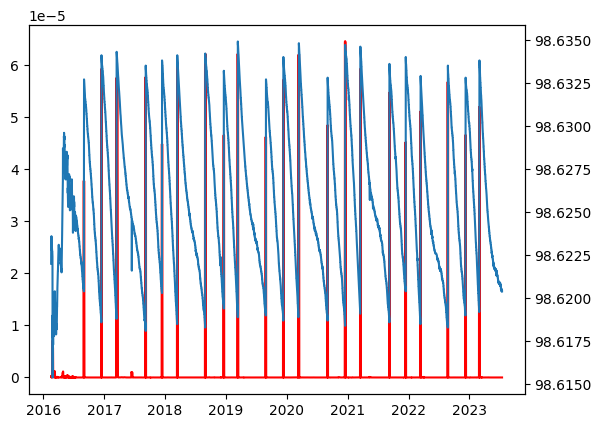

In [52]:
def l2(data):
    actual = sum(data) / len(data)
    l2s = [math.pow(d - actual, 2) for d in data]
    return sum(l2s) / len(l2s)

def slidingWindow(data, width):
    expand = [data[0] for _ in range(0, width)]
    expand.extend(data)
    expand.extend(data[-1] for _ in range(0,width))

    disc = []
    for i in range(width, width+len(data)):
        before = l2(expand[i-width:i])
        after = l2(expand[i:i+width])
        whole = l2(expand[i-width:i+width])

        disc.append(abs(after - before))

    return disc

ys = data["2016-011A"]["i"][1]
dates = data["2016-011A"]["i"][0]
disc = slidingWindow(ys, 8)
plt.plot(dates, disc, color="red")
#plt.yscale('log')
twinx = plt.twinx()
twinx.plot(dates, ys)

